# ***Proyecto EDA: Airbnb*** 
## ***Visualización***
**Autor:** Óscar Fernández-Chinchilla López

![Logo Airbnb](../images/airbnb-logo.png)


En este notebook se realizan visualizaciones básicas y algunas más avanzadas 
a partir del dataset **limpio** `airbnb_clean.csv`.

El objetivo es:
- Entender la distribución de variables numéricas clave.
- Analizar la frecuencia de categorías importantes.
- Explorar relaciones entre variables (precio, tipo de alojamiento, ubicación...).
- Detectar patrones básicos temporales y de correlación.


# 📋 ***Índice***


# ***1. Importación de libreriás y carga del dataset limpio***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath(".."))
# Cargamos el dataset limpio
df_airbnb = pd.read_csv("../data/airbnb_clean.csv")

df_airbnb.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,confirmed,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,30,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,368.0,74.0,30,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,confirmed,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,41.0,10,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
4,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,confirmed,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,...,577.0,115.0,3,74.0,2019-06-22,0.59,3.0,1.0,NaN,"No smoking, please, and no drugs."


## ***1.1 Comprobación rápida del dataset***

In [4]:
# Vistazo rápido a las columnas y tipos de datos
print(df_airbnb.shape)
df_airbnb.dtypes

(84984, 23)


id                                  int64
name                               object
host_id                             int64
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room_type                          object
construction_year                 float64
price                             float64
service_fee                       float64
minimum_nights                      int64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  float64
house_rules                        object
dtype: object

In [5]:
# Comprobamos que todos los nombres de las columnas están bien
df_airbnb.columns.tolist()

['id',
 'name',
 'host_id',
 'host_identity_verified',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'lat',
 'long',
 'instant_bookable',
 'cancellation_policy',
 'room_type',
 'construction_year',
 'price',
 'service_fee',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'review_rate_number',
 'calculated_host_listings_count',
 'availability_365',
 'house_rules']

## ***Al exportar el dataframe a .csv en el jupyter de limpieza, este no guearda tipos de datos complejos como datetime, category, etc, por lo que hay que volver a hacer la conversión de tipos de las columnas del dataframe para poder empezar a analizar las variables.***

In [6]:
# Importamos todas las funciones que ya tenemos de limpieza y conversión
from src.cleaning import (
    clean_monetary_columns,
    clean_categorical_values,
    normalize_column_names,
    format_dates,
    convert_numeric_types
)

In [7]:
# Hacemos dos listas con las columnas monetarias y las de Enteros
monetary_cols = ["price", "service_fee"]
int_cols = ["construction_year", "minimum_nights", "number_of_reviews",
            "calculated_host_listings_count", "availability_365"]

# Utilizamos las funciones
df_airbnb = clean_monetary_columns(df_airbnb, monetary_cols)
df_airbnb = clean_categorical_values(df_airbnb)
df_airbnb = normalize_column_names(df_airbnb)
df_airbnb = format_dates(df_airbnb)
df_airbnb = convert_numeric_types(df_airbnb, int_cols=int_cols)

In [8]:
# Sacamos los tipos de las columnas para comprobar que ya todo está correcto
df_airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_identity_verified                  category
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
lat                                      float64
long                                     float64
instant_bookable                         boolean
cancellation_policy                     category
room_type                               category
construction_year                          Int64
price                                    float64
service_fee                              float64
minimum_nights                             Int64
number_of_reviews                          Int64
last_review                       datetime64[ns]
reviews_per_month                        float64
review_rate_number                       float64
calculated_host_list

# ***2. Análisis estadístico de las columnas númericas limpiadas***

In [9]:
df_airbnb.describe()

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,8.498400e+04,8.498400e+04,84977.000000,84977.000000,84810.0,84764.000000,84744.000000,84984.0,84926.0,84984,84984.000000,84672.000000,84724.0,82264.0
mean,2.950917e+07,4.919894e+10,40.727483,-73.948943,2012.485273,626.096739,125.181039,7.305116,31.3037,2019-06-08 11:37:24.789607424,1.290561,3.277046,7.073781,135.298344
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,2003.0,50.000000,10.000000,1.0,1.0,2012-07-11 00:00:00,0.010000,1.000000,1.0,0.0
25%,1.524709e+07,2.445972e+10,40.687760,-73.982150,2007.0,341.000000,68.000000,2.0,3.0,2018-10-22 00:00:00,0.220000,2.000000,1.0,5.0
50%,3.084514e+07,4.906405e+10,40.721380,-73.953850,2012.0,625.500000,125.000000,3.0,11.0,2019-06-12 00:00:00,0.730000,3.000000,1.0,93.0
75%,4.333044e+07,7.387121e+10,40.762680,-73.931370,2017.0,913.000000,183.000000,5.0,38.0,2019-07-05 00:00:00,1.990000,4.000000,2.0,253.0
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.0,1200.000000,240.000000,365.0,648.0,2024-08-15 00:00:00,7.060000,5.000000,332.0,365.0
std,1.630541e+07,2.853310e+10,0.056361,0.049781,5.764712,331.504872,66.296144,15.408725,48.833267,NaN,1.412094,1.284302,29.579281,128.39464


### 📊 Interpretación del `describe()`

El análisis estadístico de las columnas tras la limpieza nos permite conocer mejor cómo son los alojamientos de Airbnb en Nueva York:

####  Registros y ubicación
- El dataset cuenta con **unas 85.000 filas válidas** según cada columna.
- Las coordenadas de latitud y longitud están dentro del rango esperado para **Nueva York**, por lo que la geolocalización es consistente.

####  Año de construcción
- Los inmuebles se registran entre **2003 y 2022**.
- La distribución es **muy uniforme**, lo cual **no refleja la realidad del parque inmobiliario de NYC**, indicando **anonimización en esta variable**.

####  Precios y tarifas
- **Precio medio por noche**: ~**626 €**
- **Tarifa de servicio media**: ~**125 €**
- La variabilidad es alta (**std ≈ 331 €**), evidenciando diferentes tipos de oferta: económica, media y lujo.
- Los precios parecen estar **acotados** (50 € - 1200 €), lo cual nuevamente refuerza que los datos han sido **procesados**.

####  Estancia mínima
- Lo común es entre **2 y 3 noches**.
- Hay valores muy altos (hasta 365 días).

####  Popularidad (reviews)
- La mayoría tiene entre **3 y 38 reseñas**.
- Existen casos con más de **600 reviews**, indicando alojamientos muy demandados.
- Las reviews mensuales son bajas → **ocupación moderada o actualización no constante**.

####  Profesionalización de hosts
- La gran mayoría de anfitriones gestiona **1 único alojamiento**.
- Algunos tienen **más de 300** → presencia de **empresas de gestión** claramente identificable.

####  Disponibilidad anual
- Media de **135 días al año**, indicando un mercado **activo**, aunque no siempre completo.

###  Conclusión del análisis descriptivo
- El dataset ofrece una visión amplia y heterogénea de los alojamientos en la ciudad de Nueva York.  
- Las métricas muestran distintos segmentos de mercado, desde económico hasta lujo.  
- Algunas columnas presentan señales de **anonimización y limitaciones**..  
Aun así, la calidad general del dataset permite avanzar con un análisis exploratorio sólido.

# ***3. Analisis y visualizaciones***

## ***3.1 Distribución del precio por noche***

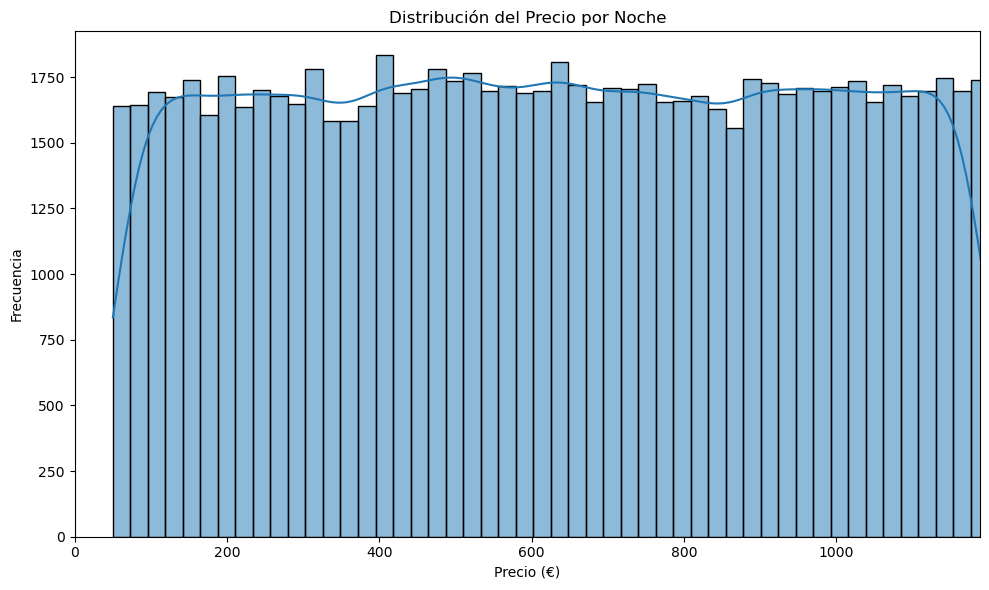

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df_airbnb["price"], bins=50, kde=True)
plt.title("Distribución del Precio por Noche")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")

# Recortamos el eje X al percentil 99 para evitar que outliers distorsionen la visualización
plt.xlim(0, df_airbnb["price"].quantile(0.99))

plt.tight_layout()
plt.show()

#### El histograma muestra cómo se distribuyen los precios por noche de los alojamientos de Airbnb en Nueva York. Para que la visualización sea más representativa, he recortado el eje en el percentil 99 y así evitar que unos pocos precios muy altos distorsionen la gráfica.

### ***Observaciones:***

- La mayoría de los alojamientos tienen un precio entre 200 € y 900 € por noche.
- Los precios están bastante repartidos en un rango amplio, lo que indica mucha variedad en el mercado.
- No hay una forma clara que nos indique una distribución normal, lo cual tiene sentido al haber distintos tipos de alojamientos: desde opciones más económicas hasta apartamentos de lujo.
- Aunque existen precios muy altos, son minoría y podrían corresponder a alojamientos premium o muy bien ubicados.

Además, se puede ver que la distribución es muy uniforme para tratarse de un mercado real. Esto me hace pensar que los precios pueden haber sido modificados o ajustados en la versión pública del dataset.
### ***Conclusión:***
Hay una gran diversidad de precios dentro de la ciudad, pero la distribución no parece completamente natural.

## ***3.2 Número de anuncios por tipo de habitación***

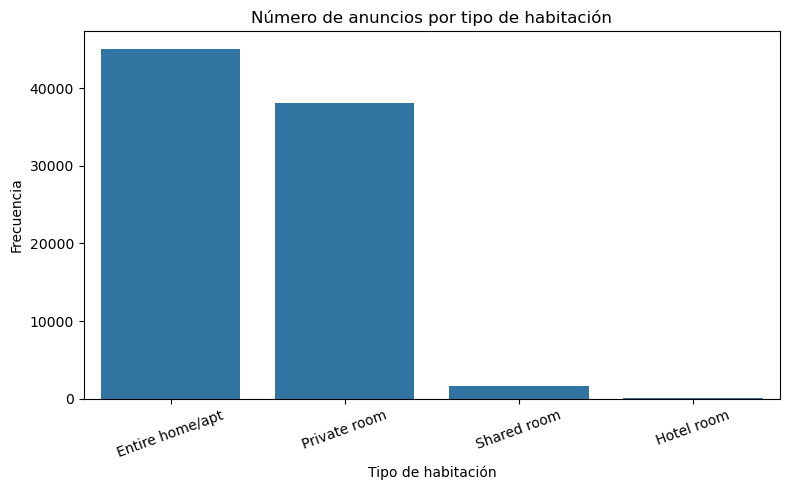

In [11]:
plt.figure(figsize=(8, 5))
order = df_airbnb["room_type"].value_counts().index
sns.countplot(data=df_airbnb, x="room_type", order=order)
plt.title("Número de anuncios por tipo de habitación")
plt.xlabel("Tipo de habitación")
plt.ylabel("Frecuencia")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [51]:
# Sacamos los porcentajes para un mejor análisis
(df_airbnb["room_type"].value_counts(normalize=True) * 100).round(1)

room_type
Entire home/apt    53.0
Private room       44.8
Shared room         2.0
Hotel room          0.1
Name: proportion, dtype: float64

## ***Conclusiones del análisis por tipo de habitación***

- El tipo de alojamiento más frecuente es **Entire home/apt**, con aproximadamente 44000 anuncios.
  Esto indica que la plataforma se utiliza ampliamente para alquiler de viviendas completas, lo cual es característico de estancias vacacionales o grupos.

- Los **Private room** representan el segundo mayor volumen de oferta, orientado a viajeros individuales o de bajo presupuesto.

- Los **Shared room** son una minoría dentro del catálogo, con muy poca popularidad, mientras que **Hotel room** es casi inexistente.

## ***3.3 Precio por tipo de habitación***

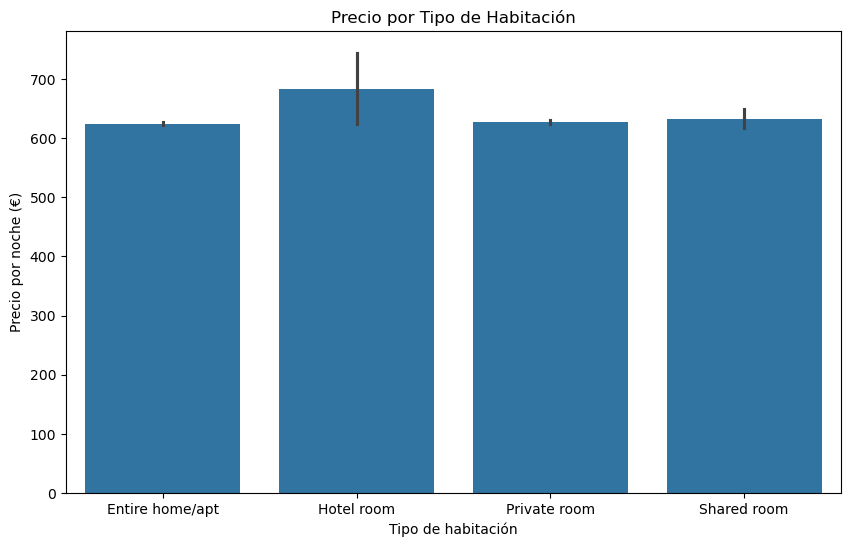

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_airbnb, x="room_type", y="price")
plt.title("Precio por Tipo de Habitación")
plt.xlabel("Tipo de habitación")
plt.ylabel("Precio por noche (€)")
plt.show()

#### En este gráfico se comparan los precios promedio por noche según el tipo de habitación disponible en Airbnb.
### ***Observaciones:***
- Los alojamientos clasificados como “Hotel room” tienen el precio medio más alto, lo que tiene sentido porque están más cerca del sector hotelero tradicional.
- Los precios de viviendas completas y habitaciones privadas son bastante parecidos entre sí.
- Las habitaciones compartidas también tienen un precio medio relativamente similar, lo cual sorprende un poco, ya que lo normal sería que fueran bastante más baratas.

### ***Conclusión:***
Las diferencias de precio entre los tipos de alojamiento no son tan marcadas como cabría esperar. Esto me hace entender que los precios del dataset podrían haber sido ajustados o anonimizados, ya que en un mercado real la diferencia entre alquilar una vivienda completa y una cama en habitación compartida debería ser mucho mayor, la habitación compartida mucho mas barata que alquilar el aparatamento entero.

## ***3.4 Distribución del precio por zona***

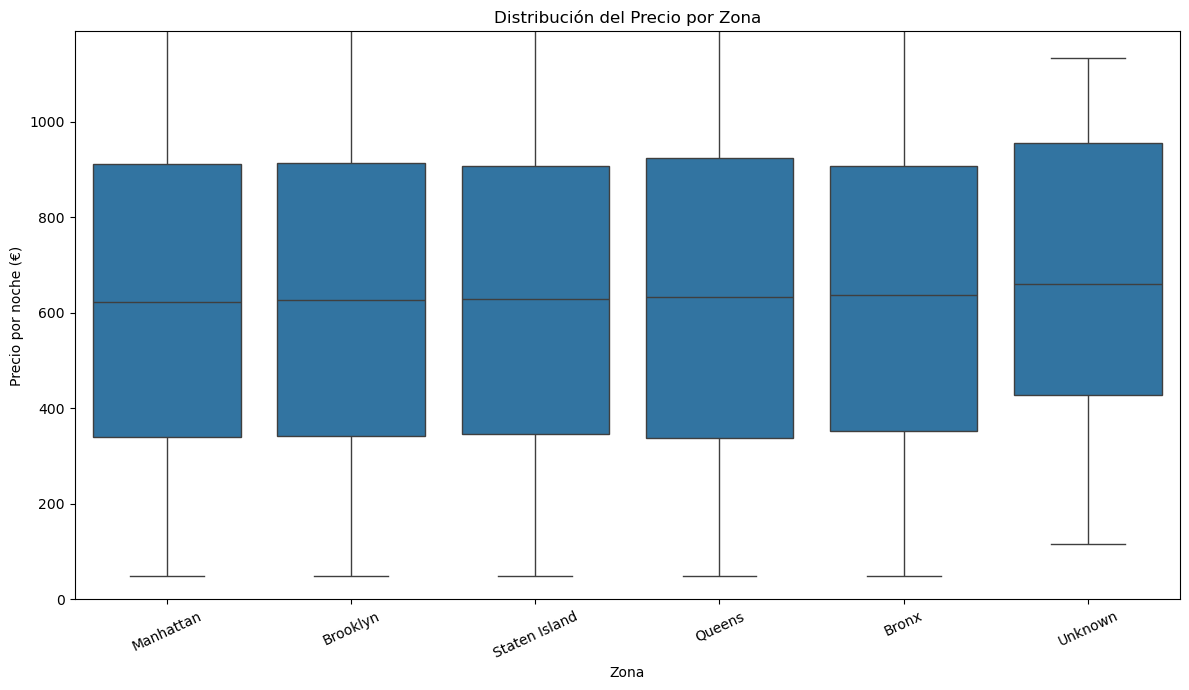

In [48]:
plt.figure(figsize=(12, 7))
order = df_airbnb.groupby("neighbourhood_group", observed=True)["price"].median().sort_values().index
sns.boxplot(data=df_airbnb, x="neighbourhood_group", y="price", order=order)
plt.title("Distribución del Precio por Zona")
plt.xlabel("Zona")
plt.ylabel("Precio por noche (€)")
plt.ylim(0, df_airbnb["price"].quantile(0.99))
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

## ***Conclusiones:***

### ***Observaciones:***
- El precio muestra variaciones entre zonas geográficas, lo cual es coherente ya que la ubicación es un factor relevante en el precio y más en Nueva York.
- Sin embargo, las distribuciones presentan rangos y medianas muy parecidas entre todas las zonas (≈600–700 €), incluyendo barrios que en el mercado real presentan diferencias de precio muy significativas, como Manhattan frente al Bronx.

Otra gráfica más que me hace entender que las variables del dataset no son muy cercanas a la realidad o que hubo errores de imputación o transformación a la hora de crearse.

## ***3.5 Número de anuncios por zona***

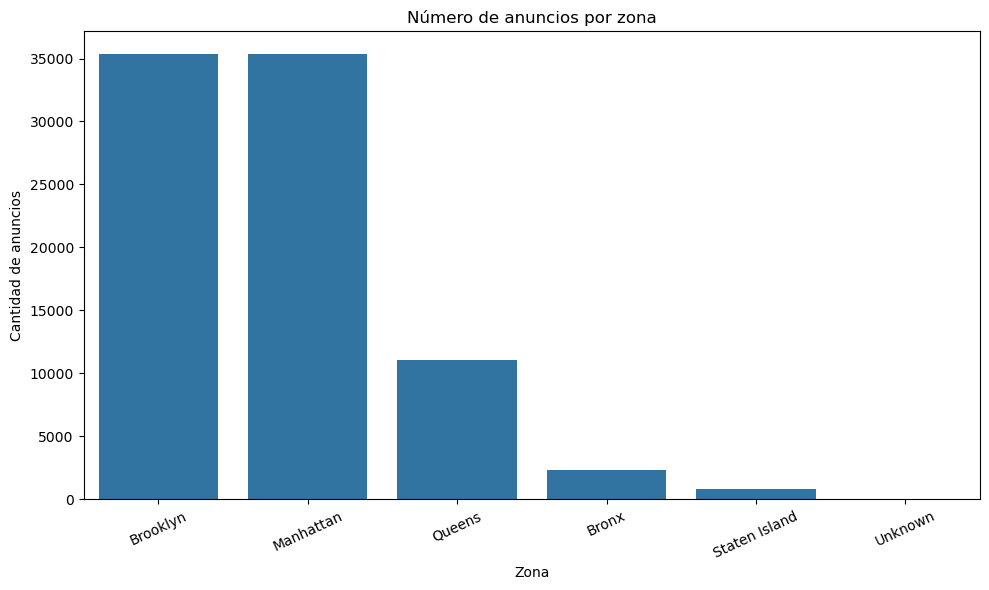

In [55]:
plt.figure(figsize=(10, 6))
order = df_airbnb["neighbourhood_group"].value_counts().index
sns.countplot(data=df_airbnb, x="neighbourhood_group", order=order)
plt.title("Número de anuncios por zona")
plt.xlabel("Zona")
plt.ylabel("Cantidad de anuncios")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

#### Este gráfico muestra detalladamente los anuncios por cada tipo de zona de Nueva York
### ***Observaciones:***
- Las zonas de Brooklyn y Manhattan son las mas frecuentes en el dataset, lo que tiene cierta lógica con el turismo y mercado real
- La zona de Queens baja exponencialmente de frecuencia pero mantiene un buen rango de anuncios
- Las zonas de Bronx y Staten Island son las menos escogidas en Airbnb por los clientes para sus alquiler.
### ***Conclusión:***
Las zonas más alquiladas por los clientes en Airbnb para alquilar cualquier tipo de habitación o apartamente son las de Manhattan y Brooklyn. algo que me cuadra por su valor turístico y posicional en el mercado real


## ***3.6 Distribución del numero de anuncios por anfitrión***

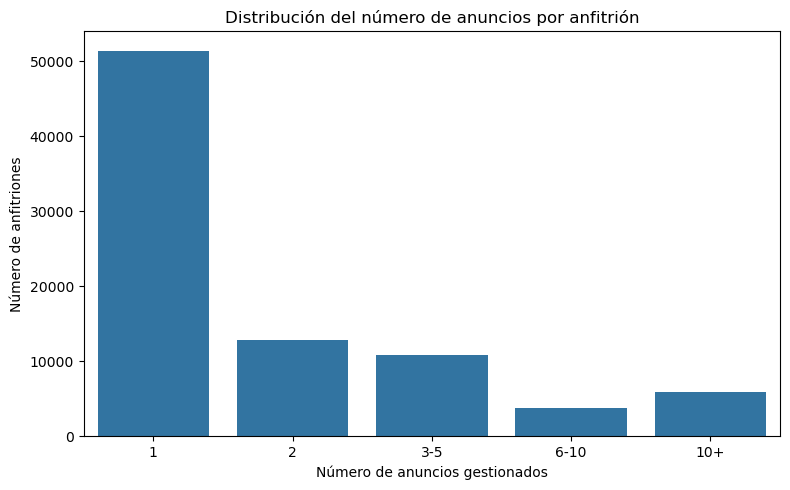

In [36]:
# Creamos categorías agrupadas por número de anuncios
bins = [0, 1, 2, 5, 10, df_airbnb["calculated_host_listings_count"].max()]
labels = ["1", "2", "3-5", "6-10", "10+"]

df_airbnb["host_category"] = pd.cut(
    df_airbnb["calculated_host_listings_count"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Contar categorías
host_counts = df_airbnb["host_category"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=host_counts.index, y=host_counts.values)
plt.title("Distribución del número de anuncios por anfitrión")
plt.xlabel("Número de anuncios gestionados")
plt.ylabel("Número de anfitriones")
plt.tight_layout()
plt.show()

#### Este gráfico muestra el número de anuncios por anfitrión (no exacto) entre rangos.
### ***Observaciones:***
- La mayoria de anfitriones o "host" llevan unicamente 1 anuncio en la plataforma.
- A partir de 2 anuncios simultáneos es cuando empieza a bajar consideradamente y gradualmente hasta el rango de (6-10)
- Existen bastantes anfitriones (unos 6000 aproximadamente) que llevan más de 10 anuncios simultáneos.
### ***Conclusión:***
Lo que me hace pensar esta gráfica es que la mayoria de anfitriones son particulares que dan alquiler de cualquier tipo de habitación en la plataforma, mientras que los que llevan entre 3-5 pueden ser profesionales independientes, los de 6-10 empresas pequeñas o inversores y los que tengan más de 10 anuncios simultáneos lo más probable es que sean empresas populares o negocios inmobiliarios.

## ***3.7 Año de construcción de los alojamientos***

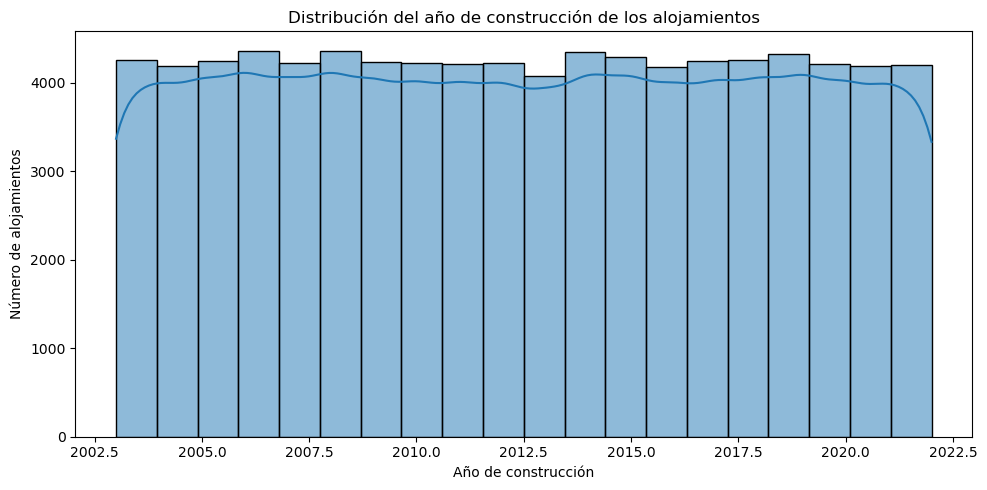

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_airbnb, x="construction_year", bins=20, kde=True)
plt.title("Distribución del año de construcción de los alojamientos")
plt.xlabel("Año de construcción")
plt.ylabel("Número de alojamientos")
plt.tight_layout()
plt.show()

La distribución del año de construcción muestra que prácticamente todos los alojamientos del dataset aparecen como construidos entre **2003 y 2022**. Esto es llamativo, ya que en ciudades como Nueva York hay una gran presencia de edificios construidos hace muchas décadas.

Esta anomalía sugiere que el dato de construcción **no es realista**, sino que probablemente ha sido:
- **anonimizado o truncado** para proteger información sensible,
- o generado/aproximado para simplificar la publicación del dataset.

Además, la distribución es **muy uniforme**, lo cual refuerza la hipótesis de que la variable ha sido manipulada
o sintéticamente ajustada para evitar la identificación de alojamientos concretos.

> Por este motivo, no utilizaremos el año de construcción como una variable fiable para extraer conclusiones
> sobre la antigüedad o calidad real de los alojamientos.

## ***3.8 Número de anuncios por mes***

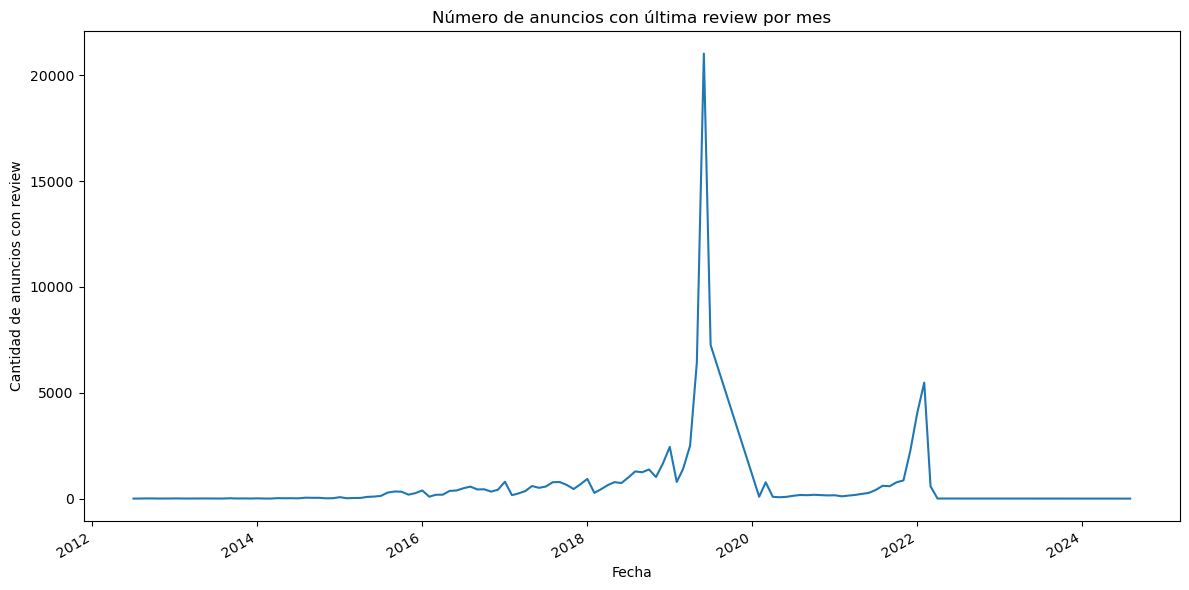

In [37]:
if "last_review" in df_airbnb.columns:
    ts = df_airbnb.dropna(subset=["last_review"]).copy()
    ts["year_month"] = ts["last_review"].dt.to_period("M").dt.to_timestamp()

    reviews_per_month = ts.groupby("year_month")["id"].count()

    plt.figure(figsize=(12, 6))
    reviews_per_month.plot()
    plt.title("Número de anuncios con última review por mes")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de anuncios con review")
    plt.tight_layout()
    plt.show()

### ***Creamos otra gráfica para que se analice mejor la actividad por mes del año***

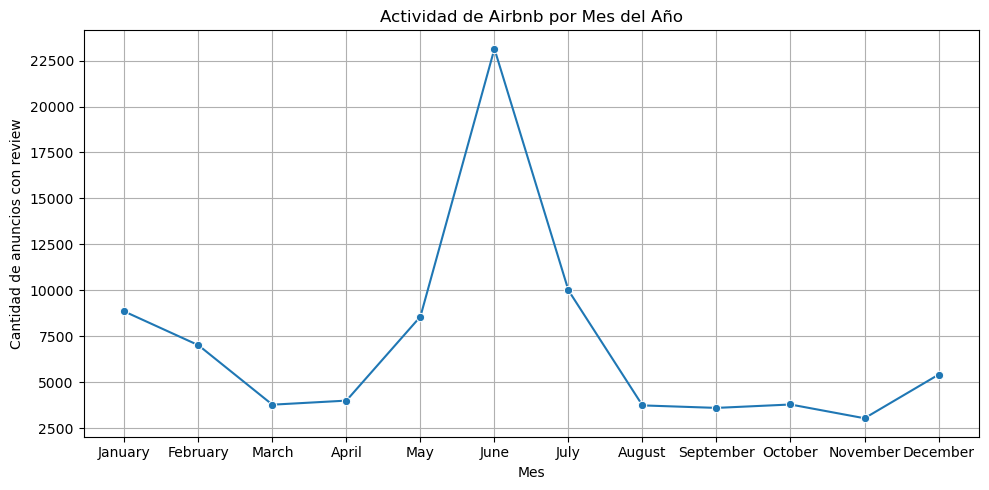

In [23]:
import calendar

# Extraemos el mes de la última review
df_temp = df_airbnb.dropna(subset=["last_review"]).copy()
df_temp["month"] = df_temp["last_review"].dt.month

# Contamos número de anuncios con review en cada mes
monthly_activity = df_temp.groupby("month")["id"].count()

# Convertimos número de mes → nombre de mes
monthly_activity.index = monthly_activity.index.map(lambda x: calendar.month_name[x])

# Reordenamos por orden real del año
order_months = [calendar.month_name[i] for i in range(1, 13)]
monthly_activity = monthly_activity.reindex(order_months)

# Visualización
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_activity.index, y=monthly_activity.values, marker="o")
plt.title("Actividad de Airbnb por Mes del Año")
plt.xlabel("Mes")
plt.ylabel("Cantidad de anuncios con review")
plt.grid(True)
plt.tight_layout()
plt.show()


#### ***Evolución de la actividad de los anuncios a lo largo del tiempo***
En la primera gráfica se muestra cuántos anuncios tienen una review reciente cada mes a lo largo de los años. Esto nos da una idea del uso real de la plataforma en el tiempo.

### ***Observaciones de la evolución temporal:***
- Hasta 2018 el crecimiento es lento pero progresivo.
- Entre 2018 y finales de 2019 se ve un gran aumento en actividad.
- A inicios de 2020 aparece un pico muy brusco, justo antes de la caída total.
- Tras ese pico, la actividad se desploma debido claramente a la pandemia de COVID-19 y la paralización del turismo.
- A partir de 2022 se observa cierta recuperación, pero todavía con niveles irregulares.

Esto refleja perfectamente el ciclo del turismo en una ciudad tan dependiente de visitantes como Nueva York.

### ***Estacionalidad del uso de Airbnb***
La segunda gráfica analiza la actividad por mes del año, agrupada sin importar el año.

### ***Observaciones de estacionalidad:***
- Junio es el mes con mayor número de reviews, lo que indica el punto fuerte de la temporada turística.
- Mayo y julio también muestran bastante actividad, aunque menor.
- Los meses de invierno (noviembre–marzo) son los más flojos en términos de movimiento.
- La caída más notable suele coincidir con el final del otoño.

Esto señala una clara estacionalidad turística, típica en destinos urbanos donde el buen clima favorece los viajes.

### ***Conclusión conjunta***
#### La demanda de Airbnb fue creciendo progresivamente hasta 2019, donde tiene un pico muy brusco de actividad y justo en ese mismo año bajó bruscamente posiblemente debido a la pandemia de COVID-19. Continuó unos años intentando recomponerse pero no fue hasta 2022 donde su actividad fue recuperandose bien de la caida de 2020. No se puede analizar muy bien los últimos años debido a la falta de actualización de los datos y variables del dataset.
#### A su vez, también se ha podido observar con la segunda gráfica que la actividad en la plataforma aumenta en los meses de Verano, donde los turístas deciden viajar y alquilar con más regularidad debido a que el buen clima es un factor muy importante en este tipo de sectores

## ***3.9 Alojamientos por zona en Nueva York***

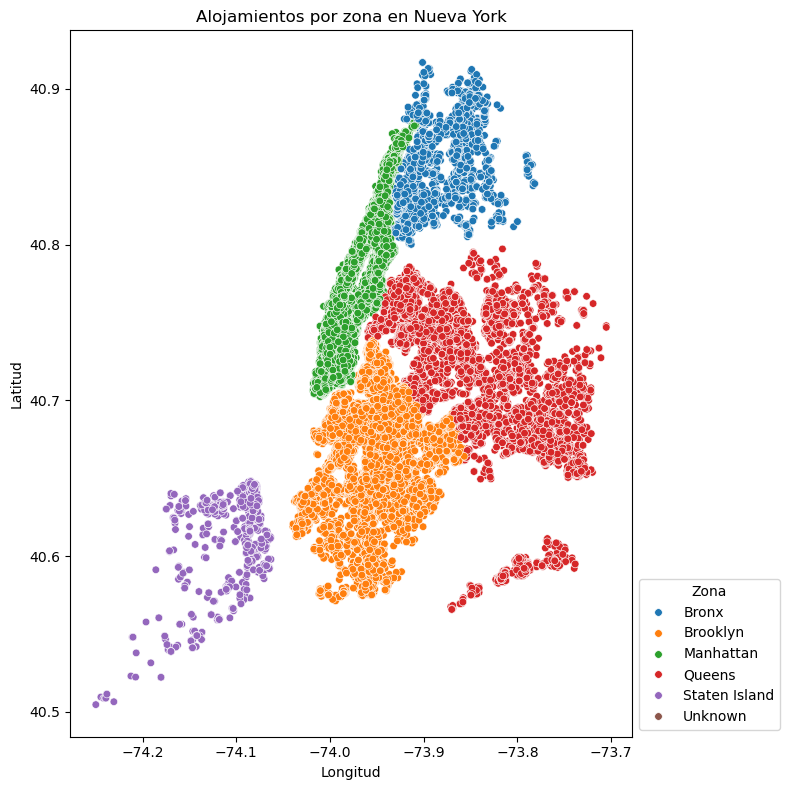

In [46]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df_airbnb,
    x="long",
    y="lat",
    hue="neighbourhood_group",
    s=30,
    alpha=1
)
plt.title("Alojamientos por zona en Nueva York")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Zona", loc="lower left", bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

In [57]:
import plotly.express as px
# Aqui creo una scatter map para que se pueda interaccionar con el mapa
df_sample = df_airbnb.sample(5000, random_state=42)

fig = px.scatter_map(
    df_sample,
    lat="lat",
    lon="long",
    color="neighbourhood_group",
    hover_name="name",
    hover_data={
        "price": True,
        "room_type": True,
        "neighbourhood": True,
        "lat": False,
        "long": False,
    },
    zoom=10,
    height=600,
    width=1000,
)

fig.update_layout(
    map_style="open-street-map",
    margin=dict(r=0, t=40, l=0, b=0),
    title="Alojamientos de Airbnb en Nueva York",
)

fig.show()

In [ ]:
# Sacamos los porcentajes de anuncios por zonas
(df_airbnb["neighbourhood_group"].value_counts(normalize=True) * 100).round(1)

neighbourhood_group
Brooklyn         41.6
Manhattan        41.6
Queens           13.0
Bronx             2.7
Staten Island     1.0
Unknown           0.0
Name: proportion, dtype: float64

## ***Nota importante: El gráfico geografico de la celda pasada no aparece desde Github por lo que se recomienda descargar la carpeta y visualizarlo en el .ipynb de visualización ya que es interactivo***

### ***Distribución geográfica de los alojamientos en Nueva York***

Estas dos visualizaciones muestran cómo se distribuyen los alojamientos de Airbnb en la ciudad de Nueva York.  
Cada punto representa un anuncio y el color indica la zona en la que se encuentra (Manhattan, Brooklyn, Queens, Bronx o Staten Island).

#### ***Observaciones principales***
- **Manhattan y Brooklyn** son los distritos con mayor concentración de alojamientos, lo cual es coherente con su relevancia turística.
- **Queens** también muestra bastante presencia, sobre todo en áreas bien conectadas y cercanas a Manhattan.
- **Bronx y Staten Island** presentan una oferta mucho menos densa, posiblemente debido a menor demanda turística.
- La forma del mapa concuerda correctamente con la geografía real de la ciudad, por lo que las coordenadas parecen fiables.

#### ***Conclusión***
Existe una clara relación entre la **ubicación** y la **atractividad turística**. Las zonas más visitadas y con mejor acceso concentran la mayoría de alojamientos, lo que confirma un patrón esperado en la oferta de Airbnb dentro de Nueva York.

El mapa interactivo complementa el análisis, permitiendo una exploración más detallada de los barrios y una visualización clara del comportamiento espacial del mercado.

## ***3.10 Precio vs Número de Reviews por tipo de habitación***

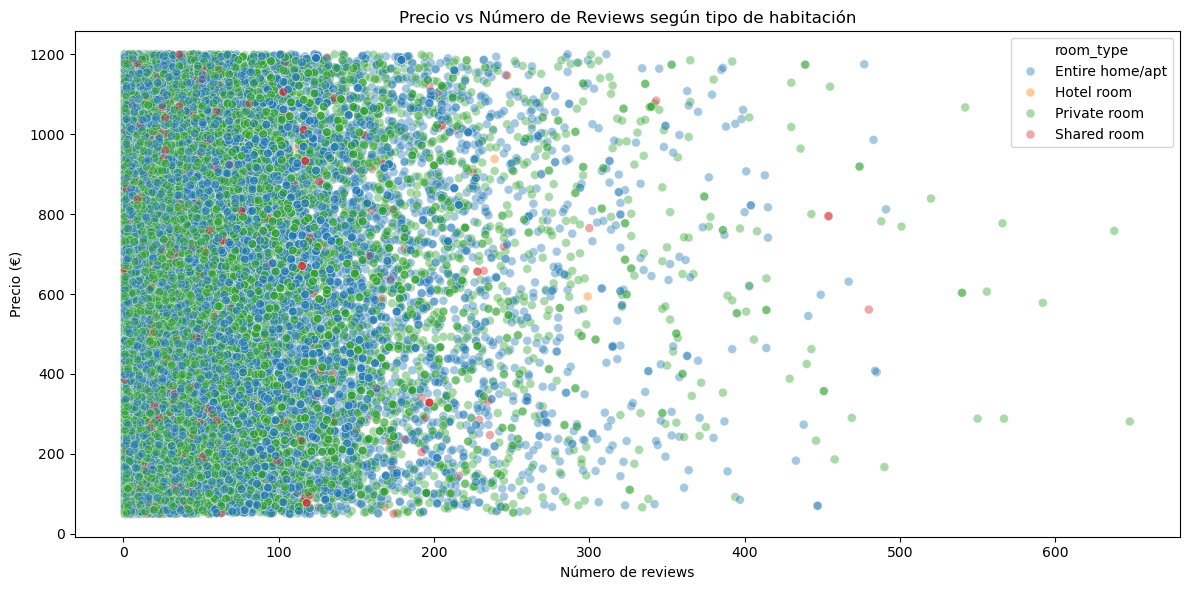

In [62]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_airbnb,
    x="number_of_reviews",
    y="price",
    hue="room_type",
    alpha=0.4,
    s=40
)

plt.title("Precio vs Número de Reviews según tipo de habitación")
plt.xlabel("Número de reviews")
plt.ylabel("Precio (€)")
plt.legend(title="room_type")
plt.tight_layout()
plt.show()

### ***Relación entre número de reviews y precio según tipo de habitación***
En esta visualización se analiza cómo se relaciona el número de reviews de un alojamiento con su precio por noche, diferenciando además por tipo de habitación.

#### ***Observaciones***
- La mayoría de los alojamientos tienen **menos de 200 reviews**, independientemente del precio o tipo de habitación.
- Los precios suelen estar entre **200 € y 900 €**, sin una relación evidente entre tener más reviews y ser más caro.
- Se observa una ligera tendencia a que los alojamientos **más económicos** acumulen un mayor número de reviews, lo que tiene sentido:  
  suelen atraer más huéspedes.
- Los alojamientos con precios más altos aparecen más dispersos y con **menos reseñas**, indicando que el turismo de lujo tiene menor rotación.
- No hay diferencias visuales muy marcadas entre tipos de habitación en cuanto a comportamiento reviews-precio.

#### ***Conclusión:***
Esta gráfica sugiere que:
- La **popularidad** (más reviews) está más asociada al **precio accesible** y posiblemente a ubicaciones con alta demanda.
- Tener un precio elevado no garantiza tener más clientes ni más visibilidad.
- El mercado está segmentado:  
  - Muchos alojamientos económicos destinados a alta rotación contra pocos alojamientos de alto precio orientados a un público más exclusivo.
En general, parece que los alojamientos más accesibles son los que impulsan la actividad principal dentro de Airbnb.

## ***4 Conclusiones del Análisis Exploratorio***

Tras el proceso de exploración, limpieza y visualización del dataset de Airbnb en Nueva York, se pueden extraer las siguientes conclusiones:

- El dataset presentaba datos válidos pero con incoherencias y valores nulos en algunas variables (fechas, reviews, licencias, etc), que fueron corregidas o eliminadas para asegurar la calidad del análisis.
- Los precios por noche presentan una alta variabilidad y no siguen una distribución normal clara. Además, su distribución irregular sugiere que los valores podrían haber sido modificados o anonimizados en la versión pública del dataset.
- La oferta de alojamientos se concentra principalmente en viviendas completas, lo que refleja un uso turístico más que residencial o comunitario de la plataforma.
- Espacialmente, los alojamientos se distribuyen sobre todo en Manhattan y Brooklyn, coincidiendo con las zonas más turísticas de la ciudad, mientras que Bronx y Staten Island tienen una presencia mucho menor.
- La evolución temporal muestra un crecimiento claro hasta 2019, una caída brusca en 2020 por la pandemia, y una recuperación progresiva en los años posteriores.
- También existe un patrón de estacionalidad marcado, con más actividad durante los meses de primavera y verano, especialmente en junio.
- Las relaciones entre precio, reviews y zona muestran un mercado muy segmentado: los alojamientos más accesibles concentran mayor actividad.

En conjunto, Airbnb en Nueva York se muestra como un mercado turístico muy activo, con una gran diversidad de oferta y una fuerte dependencia de la demanda estacional y de eventos externos como la pandemia.